In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import seaborn as sns

In [95]:
df = pd.read_csv('/content/drive/MyDrive/Online Retail Dataset.csv')

In [96]:
# removendo duplicados
df = df.drop_duplicates()

In [97]:
# valor total da venda
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [98]:
df.shape

(536744, 9)

In [99]:
# Separando os cancelados da Base
Cancelados = df.loc[df['InvoiceNo'].str.contains('C')]

In [100]:
# Removendo Cancelados da base
df = df.drop(df.loc[df['InvoiceNo'].str.contains('C')].index)

In [101]:
# Transformando data em datatime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [102]:
# Extraindo Ano, Mes
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Year-Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [103]:
# Excluindo coluna 
df = df.drop(columns='InvoiceDate')

In [104]:
# Ordenando colunas
df = df[['InvoiceNo', 'StockCode', 'Description','Month','Year' , 'Year-Month','Quantity','UnitPrice',	'CustomerID',	'Country',	'Sales']]

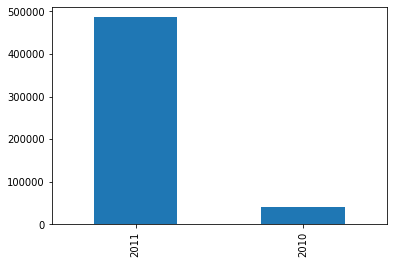

In [105]:
df.Year.value_counts().plot.bar()

In [106]:
# Separando dados por ano
Ano_2010 = df.loc[df.Year == 2010]
Ano_2011 = df.loc[df.Year == 2011]

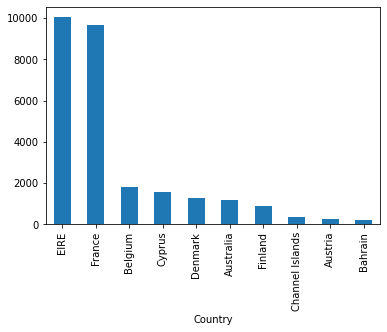

In [107]:
# País que mais comprou produto no ano de 2010
round(df.loc[df.Year == 2010].groupby('Country')['Sales'].sum().head(10).sort_values(ascending = False), 0).plot.bar()

In [108]:
# PRODUTO MAIS VENDIDO NO ANO DE 2010
round(df.loc[df.Year == 2010].groupby('Description')['Sales'].sum().sort_values(ascending = False).head(10),0)

Description
REGENCY CAKESTAND 3 TIER              27695.0
DOTCOM POSTAGE                        24671.0
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    16790.0
AMAZON FEE                            13541.0
WHITE HANGING HEART T-LIGHT HOLDER    11234.0
RED WOOLLY HOTTIE WHITE HEART.         9292.0
PAPER CHAIN KIT 50'S CHRISTMAS         9208.0
WHITE SKULL HOT WATER BOTTLE           8225.0
HOT WATER BOTTLE TEA AND SYMPATHY      8119.0
CHILLI LIGHTS                          7556.0
Name: Sales, dtype: float64

In [109]:
# PRODUTO MAIS VENDIDO NO ANO DE 2011
round(df.loc[df.Year == 2011].groupby('Description')['Sales'].sum().sort_values(ascending = False).head(10),0)

Description
DOTCOM POSTAGE                        181578.0
PAPER CRAFT , LITTLE BIRDIE           168470.0
REGENCY CAKESTAND 3 TIER              146462.0
PARTY BUNTING                          98237.0
WHITE HANGING HEART T-LIGHT HOLDER     95002.0
JUMBO BAG RED RETROSPOT                90141.0
MEDIUM CERAMIC TOP STORAGE JAR         81701.0
Manual                                 75273.0
POSTAGE                                73672.0
RABBIT NIGHT LIGHT                     66870.0
Name: Sales, dtype: float64

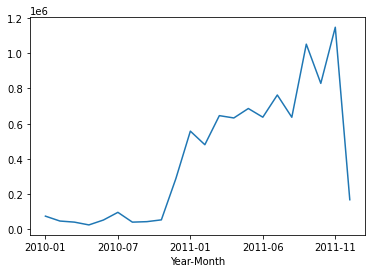

In [110]:
# Linha do tempo de United Kingdom, Mas pode colocar qualquer País
df.loc[df.Country == 'United Kingdom'].groupby('Year-Month')['Sales'].sum().plot()

In [111]:
# Produtos que mais venderam no ano de 2010
round(df.loc[df.Year == 2010].groupby('Description')['Sales'].sum().sort_values(ascending = False).head(10),0)

Description
REGENCY CAKESTAND 3 TIER              27695.0
DOTCOM POSTAGE                        24671.0
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    16790.0
AMAZON FEE                            13541.0
WHITE HANGING HEART T-LIGHT HOLDER    11234.0
RED WOOLLY HOTTIE WHITE HEART.         9292.0
PAPER CHAIN KIT 50'S CHRISTMAS         9208.0
WHITE SKULL HOT WATER BOTTLE           8225.0
HOT WATER BOTTLE TEA AND SYMPATHY      8119.0
CHILLI LIGHTS                          7556.0
Name: Sales, dtype: float64

In [112]:
# Produtos que mais venderam no ano de 2011
round(df.loc[df.Year == 2011].groupby('Description')['Sales'].sum().sort_values(ascending = False).head(10),0)

Description
DOTCOM POSTAGE                        181578.0
PAPER CRAFT , LITTLE BIRDIE           168470.0
REGENCY CAKESTAND 3 TIER              146462.0
PARTY BUNTING                          98237.0
WHITE HANGING HEART T-LIGHT HOLDER     95002.0
JUMBO BAG RED RETROSPOT                90141.0
MEDIUM CERAMIC TOP STORAGE JAR         81701.0
Manual                                 75273.0
POSTAGE                                73672.0
RABBIT NIGHT LIGHT                     66870.0
Name: Sales, dtype: float64

In [113]:
# Melhor Mes de vendas de produtos no ano de 2010
df.loc[df.Year == 2010].groupby('Month')['Sales'].sum().sort_values(ascending = False)

Month
12    324800.69
7      99553.85
1      79616.02
10     59021.02
6      54624.15
9      53548.19
2      47629.42
3      46898.63
8      45235.36
5      31364.63
Name: Sales, dtype: float64

In [114]:
# Melhor Mes de vendas de produtos no ano de 2011
df.loc[df.Year == 2011].groupby('Month')['Sales'].sum().sort_values(ascending = False)

Month
11    1336139.480
9     1203625.302
10    1027029.940
7      905018.561
5      824906.880
6      786516.590
3      756961.460
8      753503.840
4      706669.411
1      700510.610
2      575211.670
12     222440.210
Name: Sales, dtype: float64

In [115]:
df.loc[df.Year == 2010].groupby('Country')['CustomerID'].sum().sort_values(ascending = False).head(10)

Country
United Kingdom    370712259.0
Germany             6458736.0
France              5534217.0
EIRE                4943104.0
Norway              1827651.0
Portugal            1482360.0
Belgium             1177771.0
Spain               1122975.0
Netherlands         1050802.0
Cyprus              1014340.0
Name: CustomerID, dtype: float64